In [ ]:
# Modify this based on your system
SAMPLES_DATA_DIR = 'C:/opencv/sources/samples/data/'

In [ ]:
# Scaling
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread(SAMPLES_DATA_DIR+'messi5.jpg')

# Resize the image by specifying new image size
height, width = img.shape[0:2] # ignoring the number of color channels
# the new height and width should be integers
height2 = int(height * 0.5) 
width2 = int(width * 1.1)
res1 = cv2.resize(img,(width2,height2), interpolation = cv2.INTER_CUBIC)

# Resize the image by specifying scale factors
res2 = cv2.resize(img,None,fx=0.5, fy=1.1, interpolation = cv2.INTER_CUBIC)

# Display
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res2),plt.title('Scaled')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots

In [ ]:
# Translation
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread(SAMPLES_DATA_DIR+'messi5.jpg')
height, width = img.shape[0:2] # image size

# Creating the trasformation matrix for a shift of (100,50)
tx,ty = 100,50
M = np.float32([[1,0,tx],[0,1,ty]])
res = cv2.warpAffine(img,M,(width,height)) # we also need to set the new size

# Display
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res),plt.title('Shifted')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots


In [ ]:
# Rotation
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread(SAMPLES_DATA_DIR+'messi5.jpg')
height, width = img.shape[0:2] # image size

# Compute the rotation marix around the center pixel, 45 degrees, unit scale
M = cv2.getRotationMatrix2D((width/2,height/2),45,1)

# Apply the transformation matrix
res = cv2.warpAffine(img,M,(width,height))

# Display
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res),plt.title('Rotated')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots

In [ ]:
# Affine Transformation
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (load as colored)
img = cv2.imread(SAMPLES_DATA_DIR+'chessboard.png',cv2.IMREAD_COLOR)
height, width = img.shape[0:2] # image size

# Coordinates of three points from the input image
input_pts = np.float32([[500,500],[2000,500],[1000,2000]])
# Coordinates of corresponding ponits in the output image
output_pts = np.float32([[100,500],[1000,100],[1500,1000]])

# Draw the points
for i in range(input_pts.shape[0]):
    # cv2.circle(img, center, radius, color[, thickness])
    center = (input_pts[i,0],input_pts[i,1])
    cv2.circle(img,center,100,(0,255,0),-1)

# Compute the transformation matrix
M = cv2.getAffineTransform(input_pts,output_pts)

# Apply the transformation matrix
res = cv2.warpAffine(img,M,(width,height))

# Display
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res),plt.title('Transformed')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots

In [ ]:
# Perspective Transformation
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (load as colored)
img = cv2.imread(SAMPLES_DATA_DIR+'chessboard.png',cv2.IMREAD_COLOR)
height, width = img.shape[0:2] # image size

# Coordinates of three points from the input image
input_pts = np.float32([[500,500],[2000,500],[1000,2000],[1500,2100]])
# Coordinates of corresponding ponits in the output image
output_pts = np.float32([[500,500],[2000,500],[1000,2000],[1600,2500]])

# Draw the points
for i in range(input_pts.shape[0]):
    # cv2.circle(img, center, radius, color[, thickness])
    center = (input_pts[i,0],input_pts[i,1])
    cv2.circle(img,center,100,(0,255,0),-1)

# Compute the transformation matrix
M = cv2.getPerspectiveTransform(input_pts,output_pts)

# Apply the transformation matrix
res = cv2.warpPerspective(img,M,(width,height))

# Display
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res),plt.title('Transformed')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots

In [ ]:
# Image Gradients 
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (make sure it's gray-scaled)
img = cv2.imread(SAMPLES_DATA_DIR+'starry_night.jpg',cv2.IMREAD_GRAYSCALE)

# Apply 5x5 Sobel filters to the intensity channel
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
# We can also compute Sobel Mag/Phase
sobelMag = cv2.magnitude(sobelx,sobely)
sobelPhase = cv2.phase(sobelx,sobely)

# Display (note the colormap settings in plt.imshow)
plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobelx,cmap='gray'),plt.title('sobelx')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobely,cmap='gray'),plt.title('sobely')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots

# Apply the 3x3 Laplacian filter
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# Display (note the colormap settings in plt.imshow)
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian,cmap='gray'),plt.title('laplacian')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots

In [ ]:
# Canny Edge Detection
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (make sure it's gray-scaled)
img = cv2.imread(SAMPLES_DATA_DIR+'messi5.jpg',cv2.IMREAD_GRAYSCALE)

# Compute Canny edges
edges = cv2.Canny(img,100,180)

# Display (note the colormap settings in plt.imshow)
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap='gray'),plt.title('edges')
plt.xticks([]), plt.yticks([])
plt.show() # display all subplots

In [14]:
cv2.imshow('template',template),cv2.waitKey(0),cv2.destroyAllWindows()

(None, 13, None)

In [ ]:
# Image Histograms
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread(SAMPLES_DATA_DIR+'home.jpg')

COLOR = ('b','g','r') # List of colors for displaying individual histograms
for i in range(img.shape[2]):
    # Compute the histogram of image channel [i], with no masks, 256 bins
    hist = cv2.calcHist(img,[i],None,[256],[0,256])
    # Plot the 256x1 np array using matplotlib plot()
    plt.plot(hist,color=COLOR[i])
    plt.xlim([0,256]) # Set x-axis limit
plt.show()

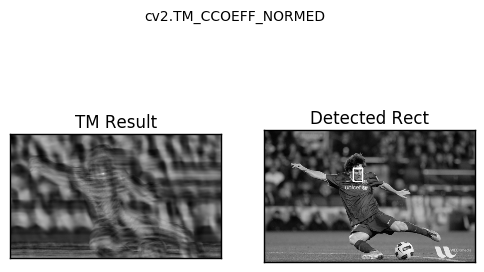

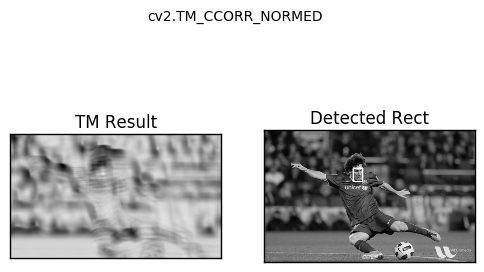

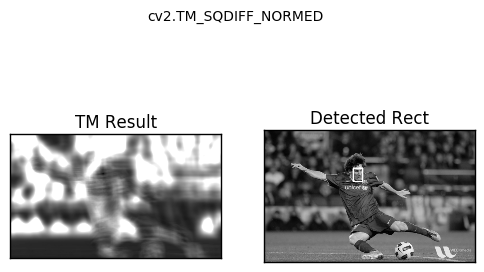

In [13]:
# Template Matching
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (make sure it's gray-scaled)
img = cv2.imread(SAMPLES_DATA_DIR+'messi5.jpg',cv2.IMREAD_GRAYSCALE)

# Create a template from Messi's face
template = img[100:135,230:255].copy()
h_t,w_t = template.shape[0:2]

# Different template matching criteria
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF_NORMED']

for meth in methods:
    # Apply template Matching
    method = eval(meth) # input is parsed and evaluated as a Python expression 
    res = cv2.matchTemplate(img,template,method)
    # useful function to find the global min/max location/values of an image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # The best matching point, is either the min (in case of distance metric)
    # or the max (in case of similarity metrics) of the result    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, use the minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    # else, use the maximum
    else:
        top_left = max_loc
        
    # To draw the rect, we need both the tl and the br corners
    bottom_right = (top_left[0] + w_t, top_left[1] + h_t)
    
    # draw a white (255) rectangle with tickness of 2
    # make a copy of the original image
    img_disp = img.copy()
    cv2.rectangle(img_disp,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('TM Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_disp,cmap = 'gray')
    plt.title('Detected Rect'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

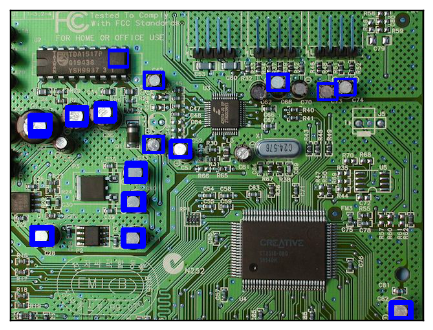

(<matplotlib.image.AxesImage at 0x17ab1723780>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 None)

In [15]:
# Template Matching with Multiple Objects
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread(SAMPLES_DATA_DIR+'board.jpg')
# Create a gray-scaled version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a template from one of the capacitors
template = img_gray[285:310,175:205].copy()
h_t,w_t = template.shape[0:2]

# Apply template Matching 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# instead of finding the max, set a threshold
threshold = 0.6

# list of all points, higher than the threshold
# loc is a tuple with len(loc) -> 2
# loc[0] is an numpy array, containing the rows
# loc[1] is an numpy array, containing the cols
loc = np.where( res >= threshold)
# loop through the points
# zip() aggregates elements from loc[0] and loc[1]
# see list(zip(*loc[::-1]))
# the -1 ordering is for obtaining (col,row) used in drawing rectangles
for pt in zip(*loc[::-1]):
    # pt is a tuple, containing (col,row) coordinates of the tl corner
    # draw a rect on the colored image
    cv2.rectangle(img, pt, (pt[0] + w_t, pt[1] + h_t), (0,0,255), 2)

# Display
plt.imshow(img),plt.xticks([]), plt.yticks([]),plt.show()

In [ ]:
# Harris Corner Detector
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (load as colored)
img = cv2.imread(SAMPLES_DATA_DIR+'chessboard.png',cv2.IMREAD_COLOR)
# Create a gray-scaled version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect Harris corners
# cv2.cornerHarris(src, neighborhoodSize, sobelKernelSize, Harris_k)
# corners is the Harris corner map, a cornerness for each pixel
corners = cv2.cornerHarris(img_gray,2,3,0.04)
# Normalize the Harris corner map between 0 and 1
cv2.normalize(corners,corners,0,1,cv2.NORM_MINMAX)

# Threshold for an optimal value, it may vary depending on the image.
threshold = 0.6

# list of all points, higher than the threshold
# loc[0] is an numpy array, containing the x coordinates
# loc[1] is an numpy array, containing the y coordinates
loc = np.where( corners >= threshold)
# loop through the points
# zip() aggregates elements from loc[0] and loc[1]
for pt in zip(*loc[::-1]):  
    # draw a filled circle on each point
    cv2.circle(img, pt,50, (255,0,0), -1)

# Display
plt.imshow(img),plt.xticks([]), plt.yticks([]),plt.show()

In [ ]:
# SIFT Feature Detector
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image 
img = cv2.imread(SAMPLES_DATA_DIR+'lena.jpg')
# Create a gray-scaled version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect SIFT features, with no masks
keypoints = sift.detect(img_gray,None)

# Draw the keypoints
img_disp = img.copy()
cv2.drawKeypoints(img,keypoints,img_disp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display
plt.imshow(img_disp),plt.xticks([]), plt.yticks([]),plt.show()

# Num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

In [ ]:
# SIFT Descriptors
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image 
img = cv2.imread(SAMPLES_DATA_DIR+'lena.jpg')
# Create a gray-scaled version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect SIFT features, with no masks
keypoints = sift.detect(img_gray,None)

# Compute SIFT descriptors
keypoints,descriptors = sift.compute(img_gray,keypoints)

# Alternatively, we can use keypoints,descriptors = sift.detectAndCompute(gray,None) to get both

# Num of SIFT keypoints/descriptors
print('descriptors size: '+ str(descriptors.shape))

# Plot a couple of 1x128 SIFT descriptors using matplotlib plot()
for i in range(3):
    # Plot the 256x1 np array using matplotlib plot()
    plt.plot(descriptors[i])
    plt.xlim([0,128]) # Set x-axis limit
plt.show()

In [ ]:
# SURF Feature Detector
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image 
img = cv2.imread(SAMPLES_DATA_DIR+'lena.jpg')
# Create a gray-scaled version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SURF_create()

# Detect SIFT features
keypoints = sift.detect(img_gray,None)

# Draw the keypoints
img_disp = img.copy()
cv2.drawKeypoints(img,keypoints,img_disp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display
plt.imshow(img_disp),plt.xticks([]), plt.yticks([]),plt.show()

# Num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))